# Web Scraping with Python and Selenium

## Libraries and settings

In [1]:
# Libraries
import os
import re
import json
import time
import random
import pandas as pd

from bs4 import BeautifulSoup

from prettytable import from_csv

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC

# Set up Chrome options
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Path to ChromeDriver
service = Service('/usr/local/bin/chromedriver')

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: /workspaces/data_ingestion/09_Web_Scraping_Python_Selenium_Cloud


## Import a list with user agents

In [2]:
# Liste mit User-Agents für Rotation
ua_path = "user_agents.txt"
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.4 Safari/605.1.15']

## Chrome headless mode (without graphical user interface)

In [3]:
# Initialize the driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
driver.get('https://store.dji.com')

# Get current url
print(driver.current_url)

# Return the full page HTML code
# print(driver.page_source)

# Gets the page's title
print(driver.title)

# Close driver
driver.close()


https://store.dji.com/nl
DJI Store - Official Store for DJI Drones, Gimbals and Accessories (Netherlands)


## Creating screenshots from a website

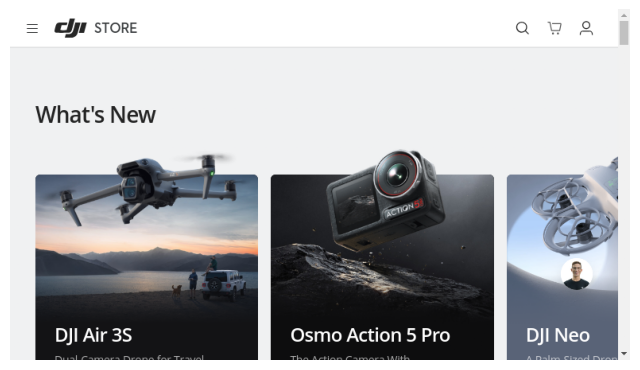

In [4]:
# Chrome-Driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
driver.get('https://store.dji.com')

# Screenshot
driver.save_screenshot('screenshot.png')

# Plot image
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

# Close driver
driver.close()

## Locating elements

There are different methods available in the Selenium API to select elements on the page. You can use:

- Name
- Tag name
- Class name
- ID
- XPath
- CSS selectors

Use the inspect element function in Chrome to get these infos:
https://www.hostinger.com/tutorials/website/how-to-inspect-and-change-style-using-google-chrome

### Locating elements using XPath

Ein Deuce von 1932, der mittels Chopping und Cleaning modifiziert wurde


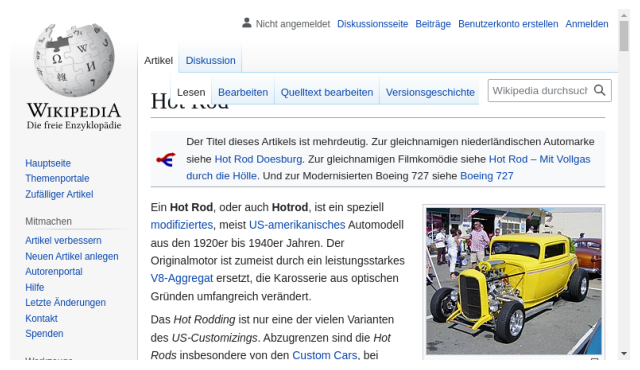

In [5]:
# Chrome-Driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
driver.get('https://de.wikipedia.org/wiki/Hot_Rod')

# Screenshot
driver.save_screenshot('screenshot.png')

# Plot image
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

# Find element using xpath
text = driver.find_element(By.XPATH, '/html/body/div[3]/div[3]/div[5]/div[1]/figure[1]/figcaption').text
print(text)

# Close driver
driver.close()

### Locating elements using tag names

Wildbienen und Schmetterlinge
Große Artenvielfalt in Weinbergen


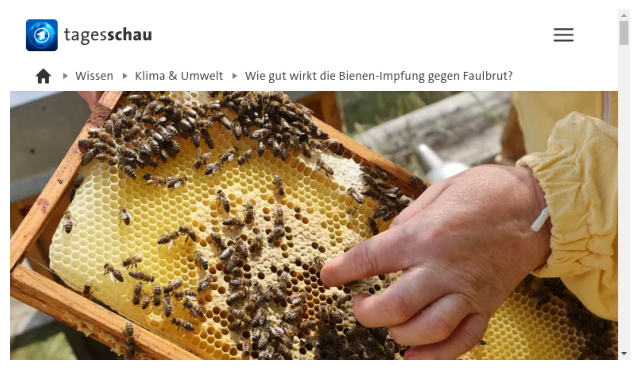

In [6]:
# Chrome-Driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
driver.get('https://www.tagesschau.de/wissen/klima/bienen-impfung-faulbrut-107.html')

# Screenshot
driver.save_screenshot('screenshot.png')

# Plot image
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(8,8))
plt.axis('off')
imgplot = plt.imshow(img)

# Find element using tag names
text = driver.find_element(By.TAG_NAME, 'h3').text
print(text)

# Close driver
driver.close()

## Sent and submit text on Wikipedia

Die Currywurst [ˈkʰœ.ʀiˌvʊʁst] (Anhörenⓘ/?) ist ein Gericht aus Brat- oder anderer Brühwurst, die ganz oder geschnitten mit einer tomatenhaltigen Sauce und Currypulver oder mit einem Curry-Ketchup serviert wird. Sie wird der deutschen Küche zugerechnet.


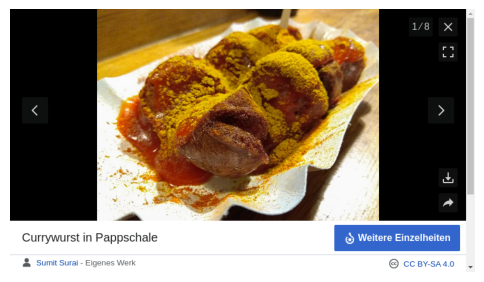

In [7]:
# Chrome-Driver
driver = webdriver.Chrome(service=service, options=options)

# Website to scrape
driver.get('https://de.wikipedia.org')

# Fill in the search text
text_to_send = 'Currywurst'
element = driver.find_element(By.XPATH, '/html/body/div[4]/div[1]/div[2]/div/form/div/input[1]')
element.send_keys(text_to_send)

# Submit search text
element.submit()

# Extract text
element = driver.find_element(By.TAG_NAME, 'p').text
print(element)

# Wait until the website is showing up
time.sleep(5)

# Click link to image on page found
driver.find_element(By.XPATH, '/html/body/div[3]/div[3]/div[5]/div[1]/figure[1]/a/img').click()

# Screenshot
time.sleep(5)
driver.save_screenshot('screenshot.png')

# Close driver
driver.close()

# Plot image
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(6,6))
plt.axis('off')
imgplot = plt.imshow(img)

## Pagination handling on https://www.minergie.ch

In [8]:
# Chrome-Driver
driver = webdriver.Chrome(service=service, options=options)

# Open file-connection
MyFile = open('minergie_objects.txt', 'w', encoding='utf-8')

obj = {}    

# Loop through first 5 pages and save objects to file
for i in range(5):
    
    # Generating URLs using page numbers
    url = str('https://www.minergie.ch/de/gebaeude/gebaeudeliste/?canton=&country=&zip_place=&street_nr=&gid=&participator=&typeofuse=&constructiontype=&year=&sortby=date_asc&numres=12&p=' + str(i+1))
    time.sleep(1)
    driver.get(url)
    
    # Click 'I agree' button for cookie-management on first page
    if i == 1:
        driver.find_element(By.XPATH, '/html/body/div[2]/div[1]/div/div[3]/div[1]/button[3]').click()
    else:
        pass
    
    print(str('--------- Page:' + str(i+1) + '-------------------------------'))
    
    for n in range(12):
        
        path = str('/html/body/div[1]/div[4]/div[7]/div/div[' + str(n+1) + ']')

        obj['Object'] = driver.find_element(By.XPATH, path).text
        obj['Object'] = obj['Object'].replace("\n", "")
        print(obj['Object'])
        
        # Write to file
        MyFile.write(obj['Object'] + "\n")
        
# Close file-connection
MyFile.close()

# Close driver
driver.close()

--------- Page:1-------------------------------
Minergie-PDefinitivMelano 6818Neubau, SchuleGebäude TI-158-A
MinergieProvisorischEcublens 1024Neubau, EFHGebäude VD-4335, ... (4)
MinergieDefinitivRenens VD 1020Neubau, EFHGebäude VD-3780
MinergieDefinitivEchallens 1040Neubau, EFHGebäude VD-3846
MinergieDefinitivEchallens 1040Neubau, EFHGebäude VD-3845
MinergieDefinitivEchallens 1040Neubau, EFHGebäude VD-3844
MinergieDefinitivEchallens 1040Neubau, EFHGebäude VD-3843
MinergieDefinitivEchallens 1040Neubau, EFHGebäude VD-3842
MinergieDefinitivEchallens 1040Neubau, EFHGebäude VD-3841
MinergieDefinitivEchallens 1040Neubau, EFHGebäude VD-3840
Minergie-P-ECOProvisorischLuzern 6006Neubau, MFHGebäude LU-050-P-ECO
MinergieDefinitivChêne-Bourg 1225Neubau, VerkaufGebäude GE-1748
--------- Page:2-------------------------------
MinergieDefinitivChêne-Bourg 1225Erneuerung, Verkauf / VerwaltungGebäude GE-1701
MinergieDefinitivChêne-Bourg 1225Neubau, MFHGebäude GE-1702
MinergieDefinitivAltdorf 6460Erneuer

## OpenStreetMap search location example

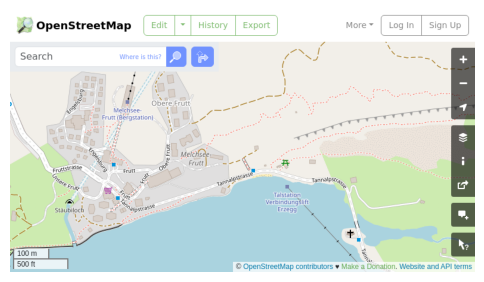

In [9]:
# Chrome driver
driver = webdriver.Chrome(service=service, options=options)

driver.get('https://www.openstreetmap.org/#map=9/46.7054/8.0283')
time.sleep(2)

# Submit address
element = driver.find_element(By.XPATH, '/html/body/div/div[1]/div[1]/form[1]/div/div[1]/div/input[1]')
element.send_keys("Melchsee-Frutt")
element.send_keys(Keys.RETURN)
time.sleep(2)

# Click info boxes
try:
    # Click 1st info-box
    info = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '/html/body/div/div[1]/div[5]/div[1]/div/button'))) 
    info.click()

    # Click 2nd info-box
    info = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '/html/body/div/div[1]/div[6]/div[1]/div/button'))) 
    info.click()

    # Click 3rd info-box
    info = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '/html/body/div/div[1]/div[7]/button')))
    info.click()
except:
    pass

# Screenshot of map
driver.save_screenshot('screenshot.png')
img = mpimg.imread('screenshot.png')
plt.figure(figsize=(6,6))
plt.axis('off')
imgplot = plt.imshow(img)

# Close driver
driver.close()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-09 18:03:19
Python Version: 3.11.10
-----------------------------------
